In [1]:
import pandas as pd

In [2]:
data = pd.read_hdf('embedding_with_label.h5', key='df')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,label,label_name,second_class,third_class,anchor_name,filter_info
0,1.001710e+06,1.924451e+06,-9.178181e+04,7.650422e+05,2.657480e+06,-3.419686e+05,1.812022e+06,3.263391e+06,3.989661e+02,-2.777783e+04,...,1.402817e+06,-6.509724e+06,-6.367662e+04,9.070438e+05,1,[special aroma],[sensory],[cooling],"2,3,4,5,6-Pentafluoro-N-(2-methylcyclohexyl)be...",578
1,-1.336173e+06,-7.572088e+05,2.192733e+06,1.151104e+06,-2.333855e+06,-2.663773e+05,4.813031e+05,1.149540e+06,-1.495367e+06,-9.187216e+05,...,-2.877578e+05,-1.576468e+06,1.439651e+06,-1.156137e+05,1,[special aroma],[mineral],[amber],95851-08-4,409
2,-8.877038e+08,-8.790483e+07,-2.605693e+08,1.666422e+08,4.794671e+07,-7.650861e+08,-3.001012e+07,2.469220e+08,-3.661227e+08,-7.488425e+08,...,7.164944e+07,-5.999727e+08,1.477895e+08,1.081356e+08,5,[sweet aroma],[honey sweet],[sweet],2-[2-[(2-Amino-3-hydroxypropanoyl)amino]propan...,163
3,-2.336236e+06,1.733280e+04,3.028212e+06,1.046613e+05,-1.229078e+06,-1.290407e+06,5.435740e+06,1.190565e+06,-2.129111e+06,-1.908545e+06,...,1.125093e+06,2.274397e+05,-2.435633e+05,-8.382878e+05,0,[maillard],[cooked],[savory],(+-)-2-Mercaptopropionic acid,108
4,-2.118656e+06,6.735827e+04,7.587775e+05,2.495710e+05,-8.195488e+04,-6.082768e+05,1.928871e+06,4.614158e+05,-2.905694e+05,-8.203199e+05,...,-3.088472e+05,-1.258140e+06,-2.552358e+05,-5.036672e+05,3,[fruity],[berry],[musty],"3-(1,3-benzodioxol-5-yl)acrylaldehyde",105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46672,-4.700778e+05,-3.792032e+05,3.435832e+05,-2.020055e+05,-3.352645e+05,-7.734866e+05,1.018262e+06,1.018014e+06,-9.647482e+05,-1.969970e+06,...,-6.793041e+05,-1.249462e+06,1.234446e+06,6.380227e+05,5,[sweet aroma],[honey sweet],[sweet],Geranic acid,639
46673,1.144631e+05,-5.334058e+05,1.914314e+05,-1.434714e+05,-6.285806e+05,-3.474193e+05,6.930386e+05,4.013828e+05,1.192107e+05,-5.816751e+04,...,5.931448e+04,-4.548672e+05,-1.161386e+05,6.305698e+04,3,[fruity],[citrus],[grapefruit],"3-Cyclohexene-1-methanol, 3,5-dimethyl-, 1-ace...",416
46674,-6.254016e+04,3.187217e+04,-7.762538e+04,5.876816e+04,-2.546163e+04,-2.496768e+05,5.099858e+05,3.020902e+05,1.101394e+05,-2.624054e+05,...,-2.067761e+05,-1.935899e+05,1.645370e+05,1.538551e+05,2,[herbal],[vegetal],[mushroom],"3-Nonen-1-ol, (3Z)-",2
46675,1.411262e+05,-2.261362e+05,-9.749165e+04,6.057081e+05,-5.567696e+05,-2.289874e+05,5.378899e+05,2.646626e+05,-7.881255e+04,-2.025873e+05,...,-1.289745e+05,-8.182870e+05,1.744062e+05,3.414193e+05,2,[herbal],[grassy],[fresh],"1-Isopropyl-4,7-dimethyl-1,2,4a,5,8,8a-hexahyd...",212


In [ ]:
data_label_counts = data['filter_info'].value_counts()

# 2. Get the top 5 labels with the highest frequency
top_labels = data_label_counts.head(5).index

# 3. Filter out the data corresponding to these labels
filtered_df = data[data['filter_info'].isin(top_labels)]

In [ ]:
filtered_df.iloc[:,0:300]

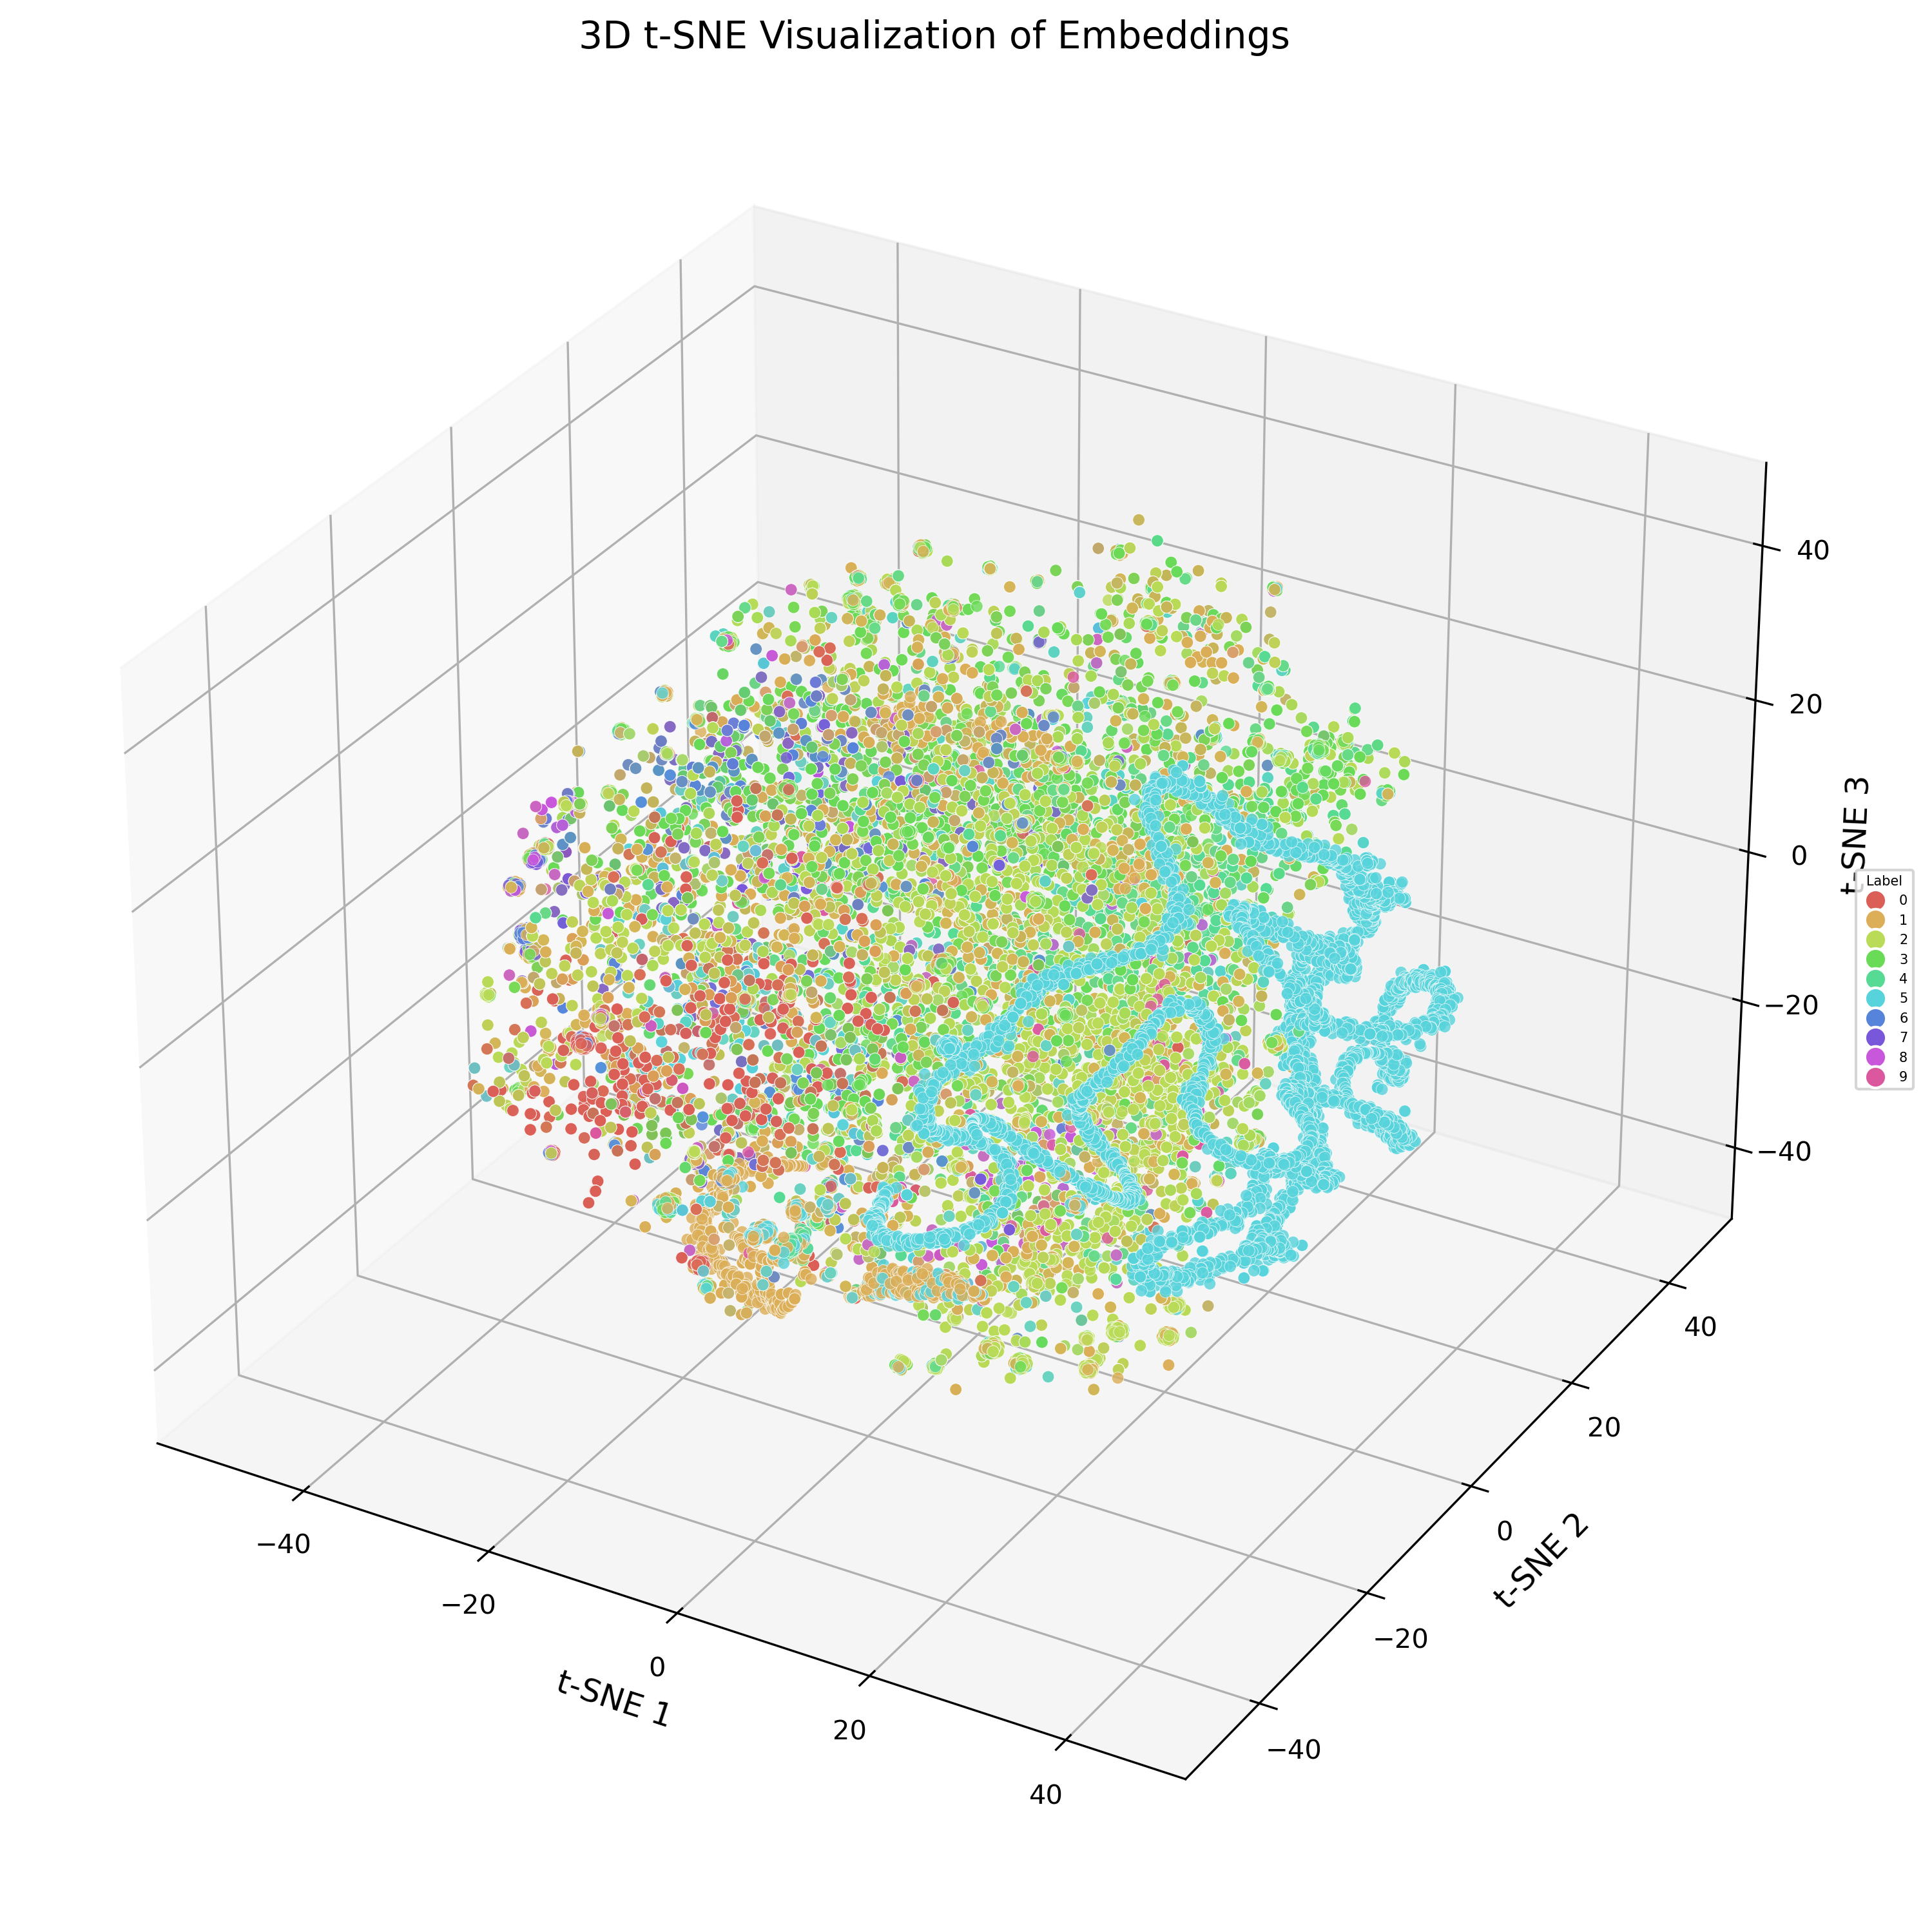

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Assume the last column is label
embeddings = data.iloc[:, 0:300].values
labels = data['label'].values

# t-SNE down to 3D
tsne = TSNE(n_components=3, perplexity=50, learning_rate='auto', init='pca', random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Color
palette = sns.color_palette('hls', len(np.unique(labels)))
label2color = {label: palette[i] for i, label in enumerate(np.unique(labels))}
colors = [label2color[label] for label in labels]

# Creating a larger image
fig = plt.figure(figsize=(12, 10), dpi=300)  
ax = fig.add_subplot(111, projection='3d')

# Draw a scatter plot
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
    c=colors, s=20, alpha=0.8, edgecolor='w', linewidth=0.2
)

# Set axis labels and titles (smaller font)
ax.set_title('3D t-SNE Visualization of Embeddings', fontsize=14)
ax.set_xlabel('t-SNE 1', fontsize=12)
ax.set_ylabel('t-SNE 2', fontsize=12)
ax.set_zlabel('t-SNE 3', fontsize=12)

# Build the legend (placed outside the graph on the right)
unique_labels = np.unique(labels)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=str(lab),
           markerfacecolor=label2color[lab], markersize=8)
    for lab in unique_labels
]

# Place the legend outside the canvas so it doesn't block the image.
ax.legend(handles=legend_elements, title='Label', loc='center left',
          bbox_to_anchor=(1.0, 0.5), fontsize=5, title_fontsize=5)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


embeddings = data.iloc[:, :-1].values
labels = data['label'].values


tsne = TSNE(n_components=3, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)


plt.figure(figsize=(8, 6), dpi=300)
palette = sns.color_palette('hls', len(np.unique(labels)))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hue=labels, palette=palette, legend='full', s=40)
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()